# 7. SymPy

This part is modificated version of Andrew Grozin work: http://www.inp.nsk.su/~grozin/python/python7.ipynb


`SymPy` is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system.

Installation:

    conda install sympy
    pip install sympy
    
Doc: http://docs.sympy.org/latest/index.html

In [1]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

The main building blocks in formulas are symbols: 

In [2]:
x = sp.Symbol('x')

In [3]:
a = x**2 - 1
print(a)
a

x**2 - 1


 2    
x  - 1

In [4]:
z = sp.Symbol('x')
z**2 - 1

 2    
x  - 1

It is possible to define several symbols at once. String will be splitted by spaces:

In [5]:
y, z = sp.symbols('y z')

Substitute $x$ with $y+1$ in a:

In [6]:
a.subs(x, y + 1)

       2    
(y + 1)  - 1

## 7.1. Polynomials and rational functions

In [7]:
a = (x + y)**2
a

       2
(x + y) 

Polynomials expansion:

In [8]:
a = sp.expand(a)
a

 2            2
x  + 2⋅x⋅y + y 

Degree by $x$ in $a$:

In [9]:
sp.degree(a, y)

2

Collect by degrees of $x$:

In [10]:
b = sp.collect(a, x)
print(b)

x**2 + 2*x*y + y**2


Factorization of polynomials:

In [11]:
a = sp.factor(a)
a

       2
(x + y) 

`SymPy` does not apply canceling automatically, use `cancel` for it:

In [12]:
a = (x**3 - y**3) / (x**2 - y**2)
a

 3    3
x  - y 
───────
 2    2
x  - y 

In [13]:
sp.cancel(a)

 2          2
x  + x⋅y + y 
─────────────
    x + y    

Use `together` to add fractions that have different denominators:

In [14]:
a = y / (x - y) + x / (x + y)
a

  x       y  
───── + ─────
x + y   x - y

In [15]:
sp.together(a)

x⋅(x - y) + y⋅(x + y)
─────────────────────
   (x - y)⋅(x + y)   

In [16]:
sp.cancel(sp.together(a))

 2    2
x  + y 
───────
 2    2
x  - y 

Функция `simplify` пытается переписать выражение *в наиболее простом виде*. Это понятие не имеет чёткого определения (в разных ситуациях *наиболее простыми* могут считаться разные формы выражения), и не существует алгоритма такого упрощения. Функция `symplify` работает эвристически, и невозможно заранее предугадать, какие упрощения она попытается сделать. Поэтому её удобно использовать в интерактивных сессиях, чтобы посмотреть, удастся ли ей записать выражение в каком-нибудь разумном виде, но нежелательно использовать в программах. В них лучше применять более специализированные функции, которые выполняют одно определённое преобразование выражения.

In [17]:
sp.simplify(a)

 2    2
x  + y 
───────
 2    2
x  - y 

Breaking apart fractions:

In [18]:
sp.apart(a, x)

    y       y      
- ───── + ───── + 1
  x + y   x - y    

You can substitude variables $x$ and $y$ with numerical values:

In [19]:
a = a.subs({x: 1, y: 2})
a

-5/3

Or even numeric value of fraction:

In [20]:
a.n(100)

-1.666666666666666666666666666666666666666666666666666666666666666666666666666
666666666666666666666667

## 7.2. Elementary functions

In [21]:
sp.cos(-x)

cos(x)

In [22]:
sp.cos(sp.pi / 4), sp.tan(5 * sp.pi / 6)

⎛√2  -√3 ⎞
⎜──, ────⎟
⎝2    3  ⎠

`SymPy` allows usage of floating point numbers with arbitrary precision. $\pi$ with precision of 120 and $e$ with the same precision:

In [23]:
print(sp.pi.n(120))
print(sp.E.n(120))

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230665
2.71828182845904523536028747135266249775724709369995957496696762772407663035354759457138217852516642742746639193200305992


In [24]:
sp.log(1), sp.log(sp.E), sp.log(2.72)

(0, 1, 1.00063188030791)

In [25]:
sp.exp(sp.log(x)), sp.log(sp.exp(x))

⎛      ⎛ x⎞⎞
⎝x, log⎝ℯ ⎠⎠

In [26]:
sp.sqrt(0)

0

In [27]:
sp.sqrt(x)**4, sp.sqrt(x**4)

⎛       ____⎞
⎜ 2    ╱  4 ⎟
⎝x , ╲╱  x  ⎠

`SymPy` allows specification of symbols. For example, positive ones:

In [28]:
p, q = sp.symbols('p q', positive=True)
sp.sqrt(p**2)

p

In [29]:
p, q = sp.symbols('p q', positive=False)
sp.sqrt(p**2)

   ____
  ╱  2 
╲╱  p  

In [30]:
sp.sqrt(12 * x**2 * y), sp.sqrt(12 * p**2 * y)

⎛        ______          ______⎞
⎜       ╱  2            ╱  2   ⎟
⎝2⋅√3⋅╲╱  x ⋅y , 2⋅√3⋅╲╱  p ⋅y ⎠

Or integer ones:

In [31]:
n = sp.Symbol('n', integer=True)
sp.exp(2 * sp.pi * sp.I * n)

 2⋅ⅈ⋅π⋅n
ℯ       

`rewrite` tries reformulate expression:

In [32]:
sp.cos(x).rewrite(sp.exp), sp.exp(sp.I * x).rewrite(sp.cos)

⎛ ⅈ⋅x    -ⅈ⋅x                   ⎞
⎜ℯ      ℯ                       ⎟
⎜──── + ─────, ⅈ⋅sin(x) + cos(x)⎟
⎝ 2       2                     ⎠

In [33]:
sp.asin(x).rewrite(sp.log)

      ⎛         __________⎞
      ⎜        ╱    2     ⎟
-ⅈ⋅log⎝ⅈ⋅x + ╲╱  - x  + 1 ⎠

`trigsimp` tries to rewrite trigonometric equation in the simplest form:

In [34]:
sp.trigsimp(2 * sp.sin(x)**2 + 3 * sp.cos(x)**2)

   2       
cos (x) + 2

In [35]:
sp.expand_trig(sp.sin(x - y)), sp.expand_trig(sp.sin(2 * x))

(sin(x)⋅cos(y) - sin(y)⋅cos(x), 2⋅sin(x)⋅cos(x))

In [36]:
a = sp.expand_log(sp.log(p * q**2))
a

   ⎛   2⎞
log⎝p⋅q ⎠

In [37]:
sp.logcombine(a)

   ⎛   2⎞
log⎝p⋅q ⎠

In [38]:
sp.expand_power_exp(x**(p + q))

 p  q
x ⋅x 

In [39]:
sp.expand_power_base((x * y)**n)

 n  n
x ⋅y 

In [40]:
sp.powsimp(sp.exp(x) * sp.exp(2 * y)), sp.powsimp(x**n * y**n)

⎛ x + 2⋅y       n⎞
⎝ℯ       , (x⋅y) ⎠

In [41]:
f = sp.Function('f')
f(x) + f(x,y)

f(x) + f(x, y)

## 7.3. Solving

In [42]:
a, b, c, d, e, f = sp.symbols('a b c d e f')

In [43]:
sp.solve(sp.Eq(a * x - b), x)

⎡b⎤
⎢─⎥
⎣a⎦

In [44]:
sp.solve(a * x - b, x)

⎡b⎤
⎢─⎥
⎣a⎦

In [45]:
sp.solve(a * x**2 + 2 * b * x + c, x)

⎡        ___________   ⎛       ___________⎞ ⎤
⎢       ╱         2    ⎜      ╱         2 ⎟ ⎥
⎢-b + ╲╱  -a⋅c + b    -⎝b + ╲╱  -a⋅c + b  ⎠ ⎥
⎢───────────────────, ──────────────────────⎥
⎣         a                     a           ⎦

In [46]:
sp.solve([a * x + b * y - e, c * x + d * y - f], [x, y])

⎧   -b⋅f + d⋅e     a⋅f - c⋅e⎫
⎨x: ──────────, y: ─────────⎬
⎩   a⋅d - b⋅c      a⋅d - b⋅c⎭

In [47]:
sp.solve(x**3 - 3 * x + 2, x)

[-2, 1]

## 7.4. Derivatives

In [48]:
a = x * sp.sin(x + y)
sp.diff(a, x)

x⋅cos(x + y) + sin(x + y)

In [49]:
sp.diff(a, y)

x⋅cos(x + y)

In [50]:
sp.diff(a, x, 2, y)

-(x⋅cos(x + y) + 2⋅sin(x + y))

In [51]:
a = x * f(x**2)
b = sp.diff(a, x)
b

   2 ⎛ d        ⎞│         ⎛ 2⎞
2⋅x ⋅⎜───(f(ξ₁))⎟│    2 + f⎝x ⎠
     ⎝dξ₁       ⎠│ξ₁=x         

## 7.5. Integrals

In [52]:
sp.integrate(1 / (x * (x**2 - 2)**2), x)

            ⎛ 2    ⎞           
log(x)   log⎝x  - 2⎠      1    
────── - ─────────── - ────────
  4           8           2    
                       4⋅x  - 8

In [53]:
sp.integrate(1/(sp.exp(x) + 1), x)

       ⎛ x    ⎞
x - log⎝ℯ  + 1⎠

In [54]:
sp.integrate(sp.log(x), x)

x⋅log(x) - x

In [55]:
sp.integrate(x * sp.sin(x), x)

-x⋅cos(x) + sin(x)

In [56]:
sp.integrate(x * sp.exp(-x**2), x)

    2 
  -x  
-ℯ    
──────
  2   

In [57]:
a = sp.integrate(x**x, x)
a

⌠      
⎮  x   
⎮ x  dx
⌡      

In [58]:
print(a)
help(sp.Integral)

Integral(x**x, x)
Help on class Integral in module sympy.integrals.integrals:

class Integral(sympy.concrete.expr_with_limits.AddWithLimits)
 |  Represents unevaluated integral.
 |  
 |  Method resolution order:
 |      Integral
 |      sympy.concrete.expr_with_limits.AddWithLimits
 |      sympy.concrete.expr_with_limits.ExprWithLimits
 |      sympy.core.expr.Expr
 |      sympy.core.basic.Basic
 |      sympy.core.evalf.EvalfMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getnewargs__(self)
 |  
 |  as_sum(self, n, method='midpoint')
 |      Approximates the definite integral by a sum.
 |      
 |      method ... one of: left, right, midpoint, trapezoid
 |      
 |      These are all basically the rectangle method [1], the only difference
 |      is where the function value is taken in each interval to define the
 |      rectangle.
 |      
 |      [1] http://en.wikipedia.org/wiki/Rectangle_method
 |      
 |      Examples
 |      ========
 |      
 |      >>> fr

In [59]:
a = sp.Integral(sp.sin(x), x)
sp.Eq(a, a.doit())

⌠                    
⎮ sin(x) dx = -cos(x)
⌡                    

`oo` is $\infty$.

In [60]:
sp.integrate(sp.exp(-x**2), (x, 0, sp.oo))

√π
──
2 

In [61]:
sp.integrate(sp.sin(x), (x, 0, sp.pi))

2

In [62]:
a = sp.Integral(sp.sin(x), (x, 0, sp.pi))
a

π          
⌠          
⎮ sin(x) dx
⌡          
0          

In [63]:
a.doit()

2

## 7.6. Limits

In [64]:
sp.limit((sp.tan(sp.sin(x)) - sp.sin(sp.tan(x))) / x**7, x, 0)

1/30

In [65]:
sp.limit((sp.tan(sp.sin(x)) - sp.sin(sp.tan(x))) / (x**7 + sp.exp(-1 / x)), x, 0, '+')

1/30

In [66]:
sp.limit((sp.tan(sp.sin(x)) - sp.sin(sp.tan(x))) / (x**7 + sp.exp(-1 / x)), x, 0, '-')

0

## 7.7. Differential equations

In [67]:
t = sp.Symbol('t')
x = sp.Function('x')

In [68]:
sp.dsolve(sp.diff(x(t), t) + x(t), x(t))

           -t
x(t) = C₁⋅ℯ  

In [69]:
sp.dsolve(sp.diff(x(t), t, 2) + x(t), x(t))

x(t) = C₁⋅sin(t) + C₂⋅cos(t)

## 7.8. Linear algebra

In [70]:
a, b, c, d, e, f = sp.symbols('a b c d e f')

In [71]:
M = sp.Matrix([[a,b,c], [d,e,f]])
M

⎡a  b  c⎤
⎢       ⎥
⎣d  e  f⎦

In [72]:
def g(i,j):
    return sp.Rational(1, i + j + 1)
sp.Matrix(3, 3, g)

⎡ 1   1/2  1/3⎤
⎢             ⎥
⎢1/2  1/3  1/4⎥
⎢             ⎥
⎣1/3  1/4  1/5⎦

In [73]:
g = sp.Function('g')
M = sp.Matrix(3, 3, g)
M

⎡g(0, 0)  g(0, 1)  g(0, 2)⎤
⎢                         ⎥
⎢g(1, 0)  g(1, 1)  g(1, 2)⎥
⎢                         ⎥
⎣g(2, 0)  g(2, 1)  g(2, 2)⎦

In [74]:
M[1,2]

g(1, 2)

In [75]:
M[1,2]=0
M

⎡g(0, 0)  g(0, 1)  g(0, 2)⎤
⎢                         ⎥
⎢g(1, 0)  g(1, 1)     0   ⎥
⎢                         ⎥
⎣g(2, 0)  g(2, 1)  g(2, 2)⎦

In [76]:
M[2,:]

[g(2, 0)  g(2, 1)  g(2, 2)]

In [77]:
M[:,1]

⎡g(0, 1)⎤
⎢       ⎥
⎢g(1, 1)⎥
⎢       ⎥
⎣g(2, 1)⎦

In [78]:
M[0:2,1:3]

⎡g(0, 1)  g(0, 2)⎤
⎢                ⎥
⎣g(1, 1)     0   ⎦

In [79]:
A = sp.Matrix([[a,b],[c,d]])
B = sp.Matrix([[b,2],[3,4]])
A + B

⎡a + b  b + 2⎤
⎢            ⎥
⎣c + 3  d + 4⎦

In [80]:
A * B, B * A

⎛                        ⎡            2       ⎤⎞
⎜⎡a⋅b + 3⋅b  2⋅a + 4⋅b⎤, ⎢a⋅b + 2⋅c  b  + 2⋅d ⎥⎟
⎜⎢                    ⎥  ⎢                    ⎥⎟
⎝⎣b⋅c + 3⋅d  2⋅c + 4⋅d⎦  ⎣3⋅a + 4⋅c  3⋅b + 4⋅d⎦⎠

In [81]:
A * B - B * A

⎡                               2            ⎤
⎢      3⋅b - 2⋅c         2⋅a - b  + 4⋅b - 2⋅d⎥
⎢                                            ⎥
⎣-3⋅a + b⋅c - 4⋅c + 3⋅d       -3⋅b + 2⋅c     ⎦

In [82]:
sp.det(A)

a⋅d - b⋅c

## 7.9. Plotting

`SymPy` uses `matplotlib`

In [83]:
%matplotlib notebook

<IPython.core.display.Javascript object>


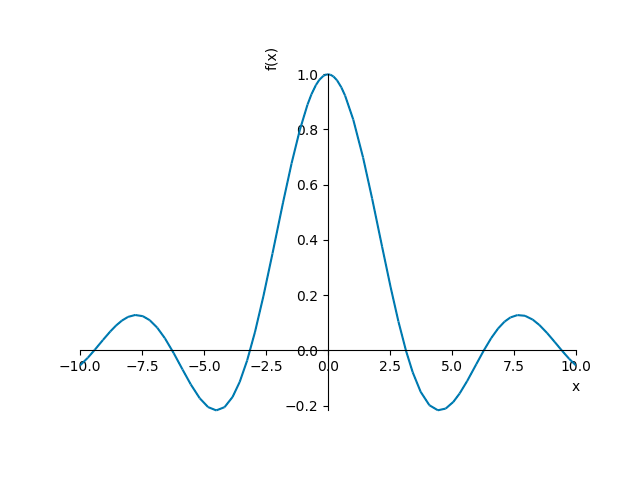

In [84]:
x = sp.Symbol('x')
_ = sp.plot(sp.sin(x) / x, (x, -10, 10))

<IPython.core.display.Javascript object>


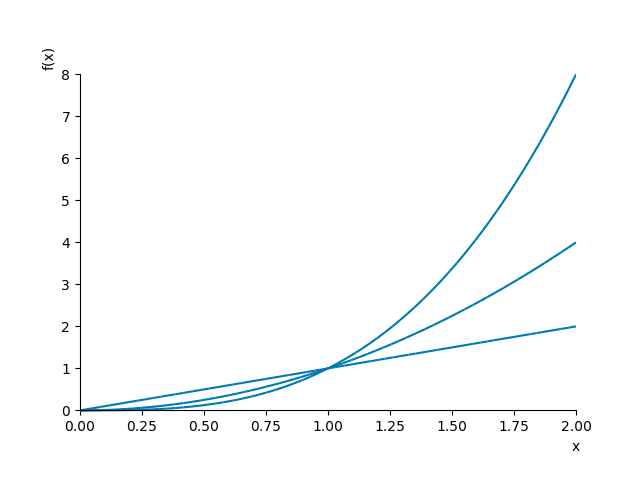

In [85]:
_ = sp.plot(x,  x**2, x**3, (x, 0, 2))

Parametric plots:

<IPython.core.display.Javascript object>


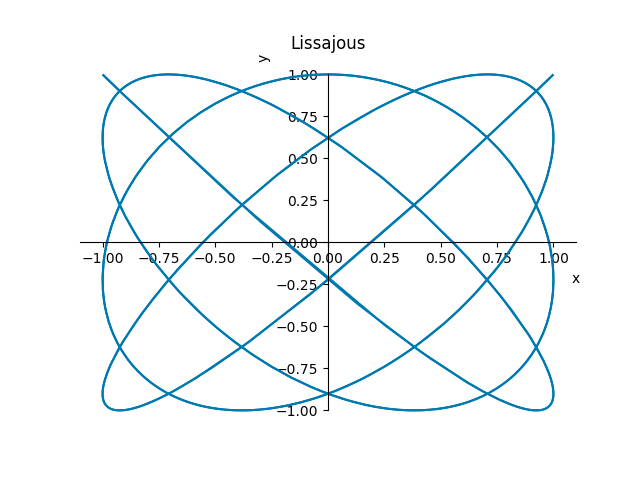

In [86]:
t = sp.Symbol('t')
_ = sp.plotting.plot_parametric(sp.sin(7 * t), sp.cos(8 * t), (t, 0, 2 * sp.pi), title='Lissajous', xlabel='x', ylabel='y')

Surface:

<IPython.core.display.Javascript object>


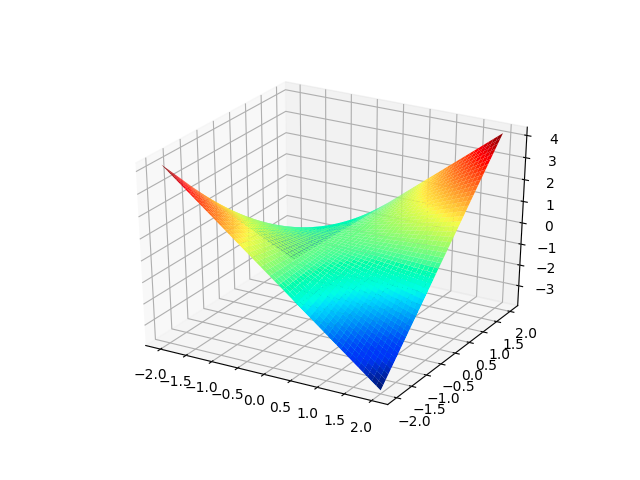

In [87]:
_ = sp.plotting.plot3d(x * y + 0.2, (x, -2, 2), (y, -2, 2))

Several plots:

<IPython.core.display.Javascript object>


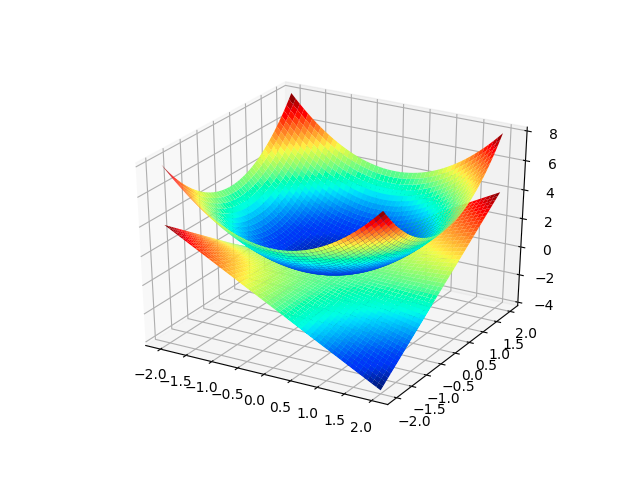

In [88]:
_ = sp.plotting.plot3d(x**2 + y**2, x*y, (x, -2, 2), (y, -2, 2))

3-dim parametric plot:

<IPython.core.display.Javascript object>


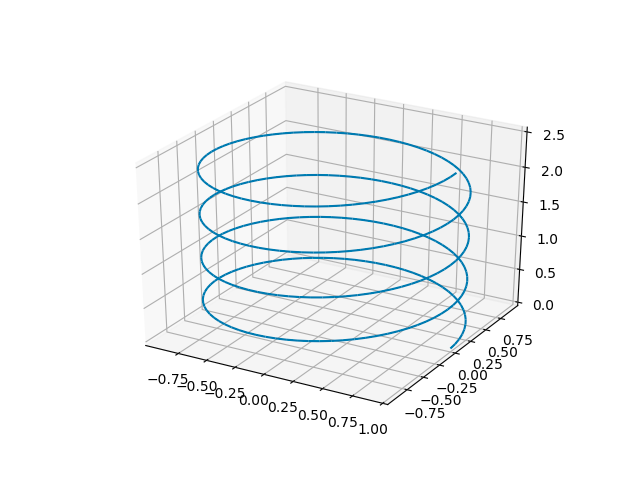

In [89]:
a = 0.1
_ = sp.plotting.plot3d_parametric_line(sp.cos(t), sp.sin(t), a*t, (t, 0, 8 * sp.pi))

Parametric surface:

<IPython.core.display.Javascript object>


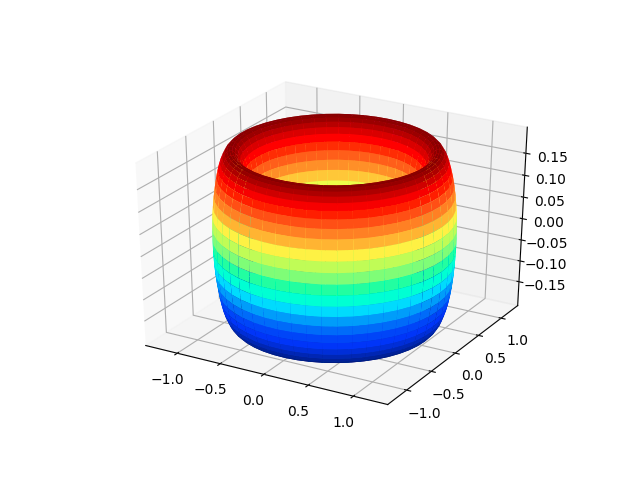

In [90]:
u, v = sp.symbols('u v')
a = 0.2
_ = sp.plotting.plot3d_parametric_surface((1 + a * sp.cos(u)) * sp.cos(v),
                          (1 + a * sp.cos(u)) * sp.sin(v), a * sp.sin(u),
                          (u, 0, 2 * sp.pi), (v, 0, 2 * sp.pi))